In [51]:
# This block is used for uploading the api key associated with my account
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 76 bytes


In [52]:
# Brought this from the kaggle page

!kaggle datasets download -d amoghmisra27/grocery

grocery.zip: Skipping, found more recently modified local copy (use --force to force download)


In [55]:
from zipfile import ZipFile
#Extracting the dataset contents
zipFilePath='/content/grocery.zip'
zipFileObj=ZipFile(file=zipFilePath)
zipFileObj.extractall('/tmp/dataset')


In [56]:

test_path='/tmp/dataset/GroceryStoreDataset-master/dataset/test'


train_path='/tmp/dataset/GroceryStoreDataset-master/dataset/train'

In [57]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [58]:
IMAGE_SIZE = [224, 224]

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
!ls '/content/drive'

MyDrive


In [34]:
#Give dataset path
train_path = '/content/drive/MyDrive/Colab Notebooks/thesis 400/GroceryStoreDataset-master/dataset/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/thesis 400/GroceryStoreDataset-master/dataset/test'

In [ ]:
#Only to show the content nothing else
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_path+'/Fruit/Apple/Golden-Delicious'


apple_train = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(apple_train)))
print("Image examples: ")

x = len(apple_train)
for i in range(x):
    print(apple_train[i])
    display(_Imgdis(filename=folder + "/" + apple_train[i], width=240, height=240))

In [60]:

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [61]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_3')>

In [62]:
for layer in vgg.layers:
  layer.trainable = False

In [74]:
folders = glob('/tmp/dataset/GroceryStoreDataset-master/dataset/train')
print(len(folders))

1


In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='relu')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

In [100]:
from tensorflow import keras
import tensorflow as tf 
from keras import optimizers


adam = tf.keras.optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [101]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [102]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [103]:

train_set = train_datagen.flow_from_directory(train_path,
                                              target_size = (224, 224),
                                              batch_size = 32,
                                              class_mode = 'categorical')

Found 2640 images belonging to 3 classes.


In [104]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2485 images belonging to 3 classes.


In [105]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint
from keras.models import Model



checkpoint = ModelCheckpoint(filepath='Gmodel1', 
                               verbose=2, save_best_only=True)

callback = [checkpoint]

start = datetime.now()
model_history = model.fit(
  x= train_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=10,
  validation_steps=32, callbacks=callback,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/20

Epoch 1: val_loss improved from inf to 5.14165, saving model to Gmodel1
10/10 - 20s - loss: 5.2394 - accuracy: 0.6583 - val_loss: 5.1416 - val_accuracy: 0.6667 - 20s/epoch - 2s/step
Epoch 2/20

Epoch 2: val_loss did not improve from 5.14165
10/10 - 17s - loss: 5.1417 - accuracy: 0.6667 - val_loss: 5.1416 - val_accuracy: 0.6667 - 17s/epoch - 2s/step
Epoch 3/20

Epoch 3: val_loss did not improve from 5.14165
10/10 - 17s - loss: 5.1417 - accuracy: 0.6667 - val_loss: 5.1416 - val_accuracy: 0.6667 - 17s/epoch - 2s/step
Epoch 4/20

Epoch 4: val_loss did not improve from 5.14165
10/10 - 17s - loss: 5.1417 - accuracy: 0.6667 - val_loss: 5.1416 - val_accuracy: 0.6667 - 17s/epoch - 2s/step
Epoch 5/20

Epoch 5: val_loss did not improve from 5.14165
10/10 - 17s - loss: 5.1417 - accuracy: 0.6667 - val_loss: 5.1416 - val_accuracy: 0.6667 - 17s/epoch - 2s/step
Epoch 6/20

Epoch 6: val_loss did not improve from 5.14165
10/10 - 17s - loss: 5.1417 - accuracy: 0.6667 - val_loss: 5.1416 - val_

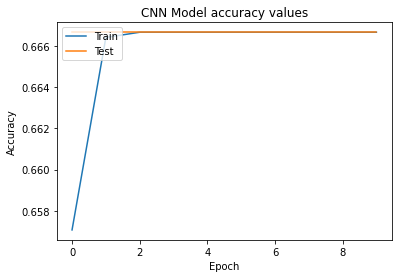

In [96]:
# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [49]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Model
import tensorflow as tf


checkpoint = ModelCheckpoint(filepath='Gmodel1', 
                               verbose=2, save_best_only=True)

callback = [checkpoint]

start = datetime.now()
model.fit(train_set,
          batch_size=32,
          epochs=10,
          verbose=1,
          validation_data=test_set)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10


InvalidArgumentError: ignored